Name: Anuva Negi

ID: 1002238067

##Decision Tree Classifier:


In [1]:
# Import necessary libraries
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_text
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
uploaded = files.upload()

Saving df_dt_clean.csv to df_dt_clean.csv


##DataSet After preprocessing from Project 1
Taking the preprocessed and transformed dataset



In [3]:
df_dt = pd.read_csv('df_dt_clean.csv')
df_dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.285714,blue-collar,single,secondary,no,0.623263,no,no,cellular,1,apr,0.616715,0.2,0.000000,0.0,success,no
1,0.553571,management,divorced,tertiary,no,0.623263,no,no,cellular,1,apr,0.268972,0.4,0.578261,1.0,failure,no
2,0.250000,services,single,tertiary,no,0.575228,yes,no,cellular,1,apr,0.507205,0.0,0.400000,0.5,failure,no
3,0.500000,management,divorced,tertiary,no,0.623263,yes,no,cellular,1,apr,0.189241,0.2,0.000000,0.0,failure,no
4,0.142857,management,single,tertiary,no,0.623263,no,no,cellular,1,apr,0.247839,0.0,0.000000,0.0,success,no


In [4]:
df_dt['y'].unique()  # values in y

array(['no', 'yes'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
# List of categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']  # Corrected: Directly list column names

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_dt[col] = le.fit_transform(df_dt[col])

# Encode the target variable ('y') as binary (1 for 'yes', 0 for 'no')
df_dt['y'] = df_dt['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [6]:
df_dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.285714,1,2,1,0,0.623263,0,0,0,1,0,0.616715,0.2,0.000000,0.0,1,0
1,0.553571,4,0,2,0,0.623263,0,0,0,1,0,0.268972,0.4,0.578261,1.0,0,0
2,0.250000,7,2,2,0,0.575228,1,0,0,1,0,0.507205,0.0,0.400000,0.5,0,0
3,0.500000,4,0,2,0,0.623263,1,0,0,1,0,0.189241,0.2,0.000000,0.0,0,0
4,0.142857,4,2,2,0,0.623263,0,0,0,1,0,0.247839,0.0,0.000000,0.0,1,0


In [7]:
df_dt['housing'].unique()    #after labeled ecoding we get categorical values in form of numerical values

array([0, 1])

### Divide dataset as into X (dataset with features) and y (outcome column)

In [8]:
y = df_dt['y']
X = df_dt.drop('y', axis=1)  #drop y column

In [9]:
# Train a basic Decision Tree to extract feature importances
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

DecisionTreeClassifier(random_state=42)

## Get 6 best features

In [10]:
# Get feature importances and sort them
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Show the top 6 features
top_6_features = feature_importances.head(6)
print("Top 6 most influential features:\n", top_6_features)

Top 6 most influential features:
 duration    0.201717
month       0.122461
balance     0.114288
day         0.110556
age         0.106065
job         0.053336
dtype: float64


The top 6 features are the most important because they provide the best splits in the decision tree, reducing classification errors significantly.
These features offer the most distinct separation between classes, are less correlated with other features, and are consistently reliable across multiple tree splits.
They will appear early in the tree (root)and help reduce impurity are typically ranked higher in importance.

## Spliting dataset into training and testing

In [11]:
# Split the dataset into training (75%) and testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Gini and Entropy are the function to measure for a good quality of a split.

In [12]:
# Gini Criteria
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [13]:
# Entropy Criteria
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

###Predictions

In [14]:
# Predictions using both models
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

Confusion Matrix for Gini:


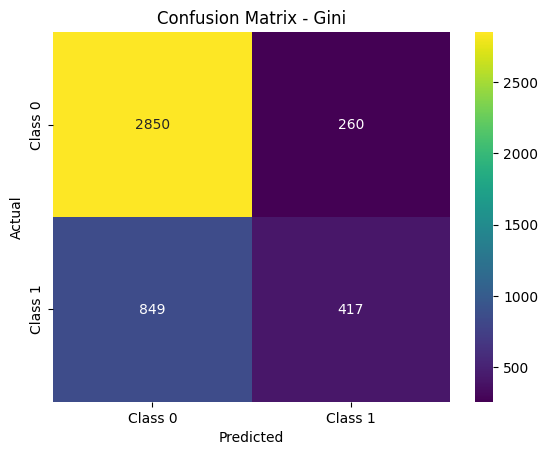



Confusion Matrix for Entropy:


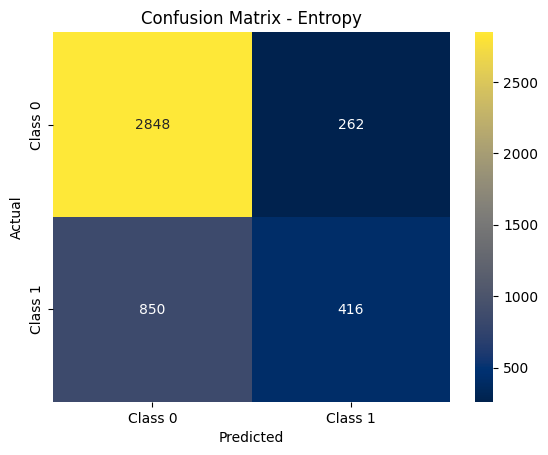

In [15]:
# Confusion Matrix for Gini
print("Confusion Matrix for Gini:")
cm_gini = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(cm_gini, annot=True, fmt='d', cmap='viridis', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Gini')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('\n')
# Confusion Matrix for Entropy
print("Confusion Matrix for Entropy:")
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
sns.heatmap(cm_entropy, annot=True, fmt='d', cmap='cividis', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Entropy')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Based on confusion matrix we can say gini is better than entropy

###Classification Reports for Gini and Entropy

In [16]:
# Classification Report for Gini
print("Classification Report for Gini:")
print(classification_report(y_test, y_pred_gini))

# Classification Report for Entropy
print("Classification Report for Entropy:")
print(classification_report(y_test, y_pred_entropy))

Classification Report for Gini:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      3110
           1       0.62      0.33      0.43      1266

    accuracy                           0.75      4376
   macro avg       0.69      0.62      0.63      4376
weighted avg       0.73      0.75      0.72      4376

Classification Report for Entropy:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      3110
           1       0.61      0.33      0.43      1266

    accuracy                           0.75      4376
   macro avg       0.69      0.62      0.63      4376
weighted avg       0.72      0.75      0.72      4376



##Decision trees : For Gini and Entropy

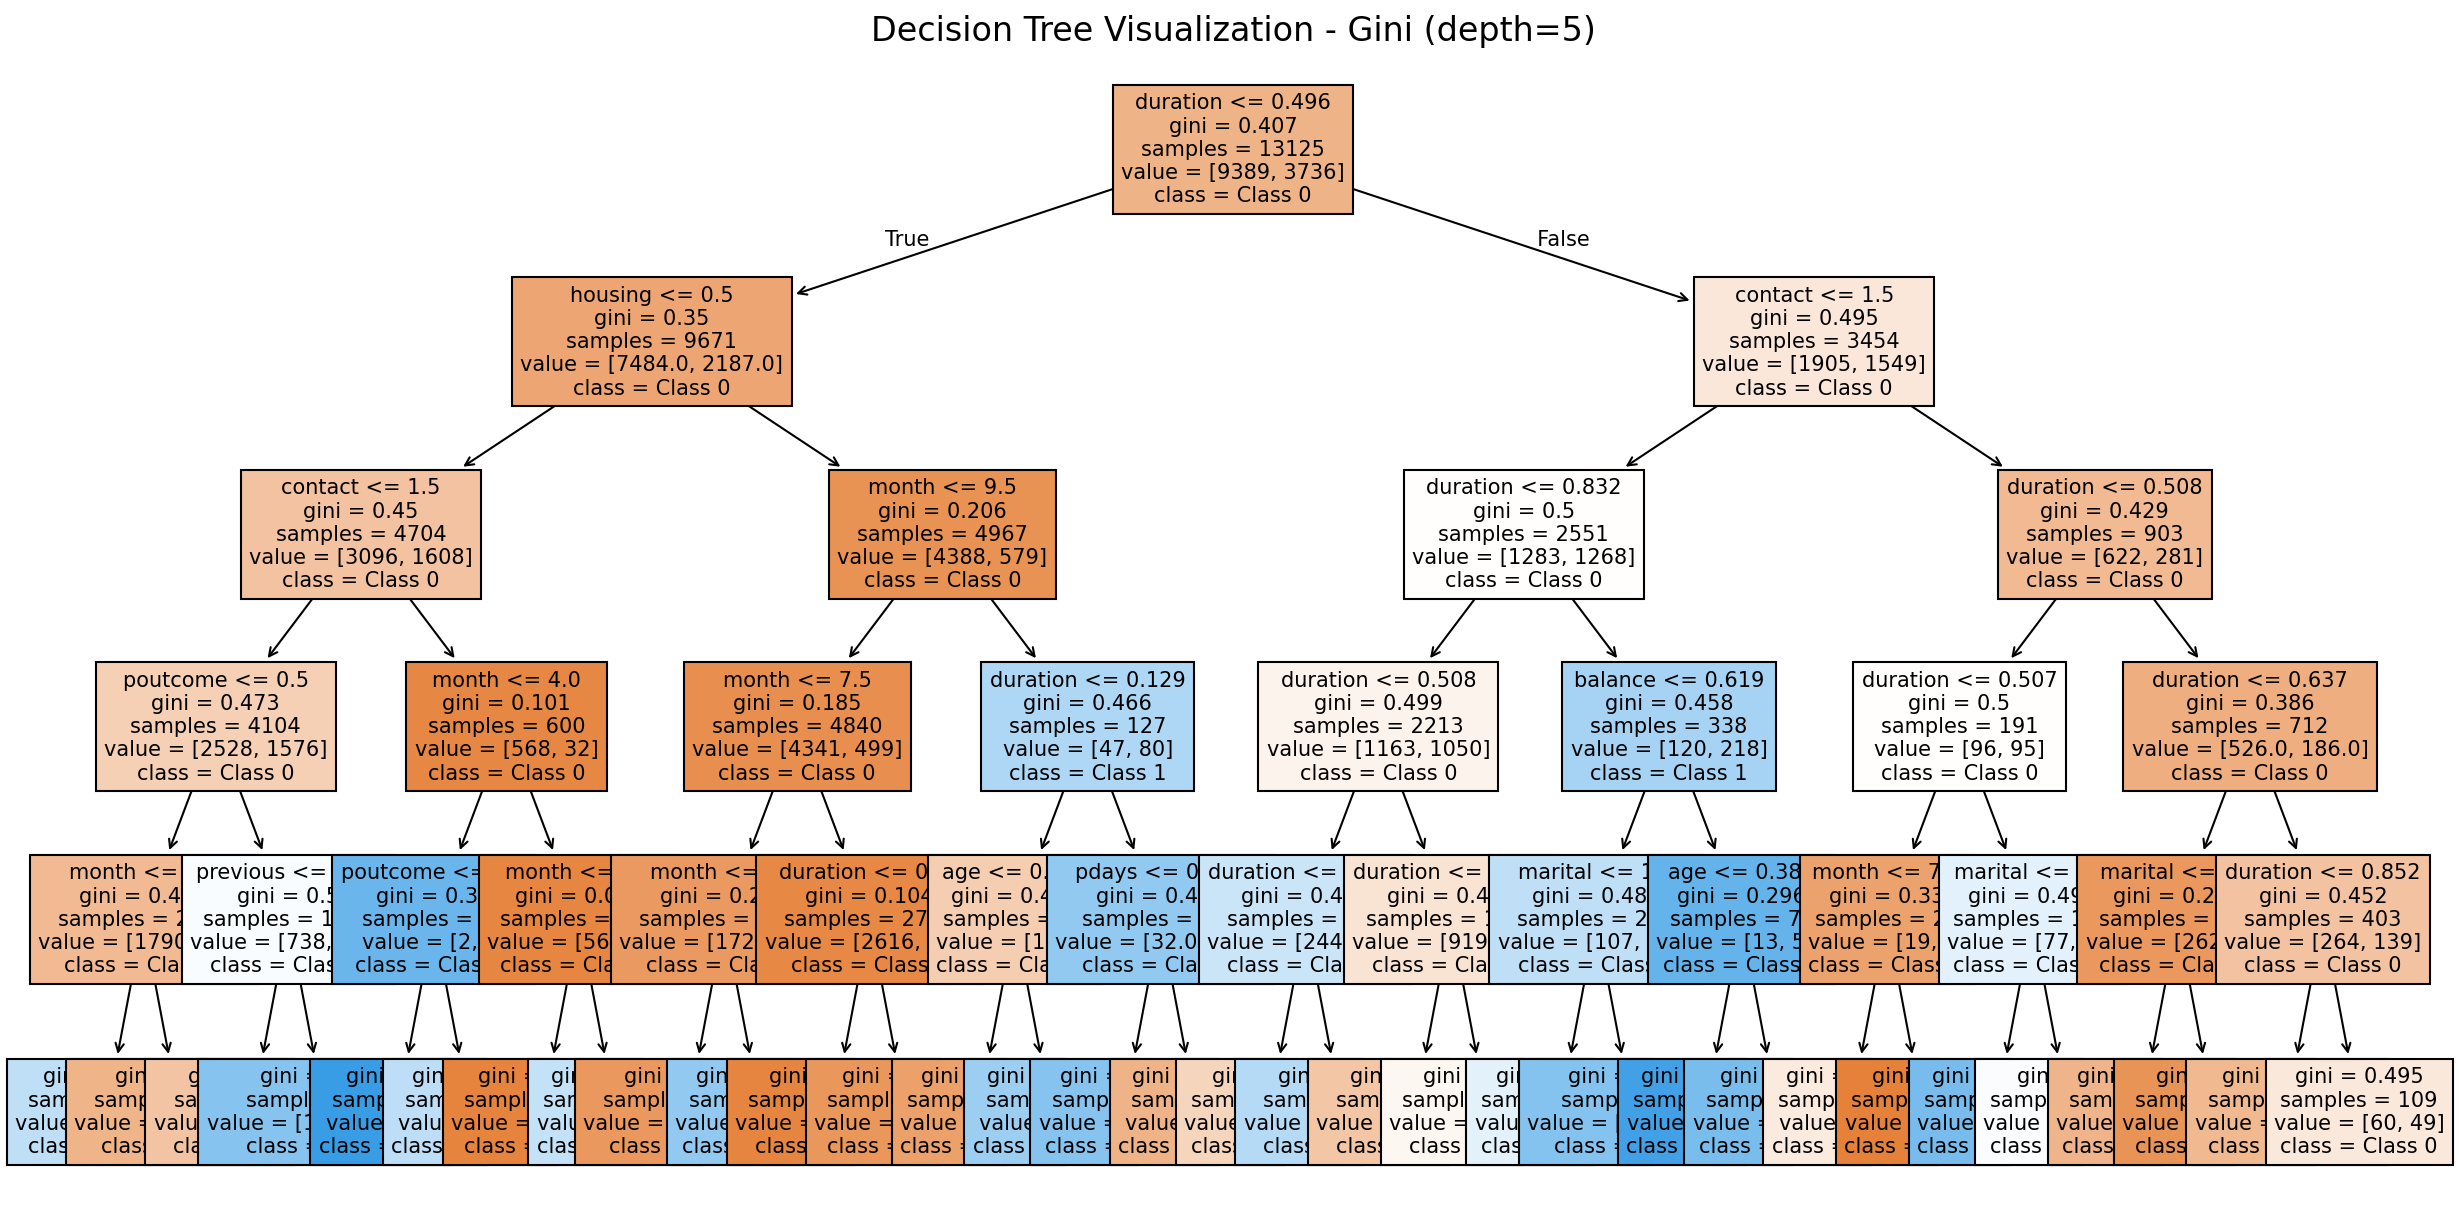

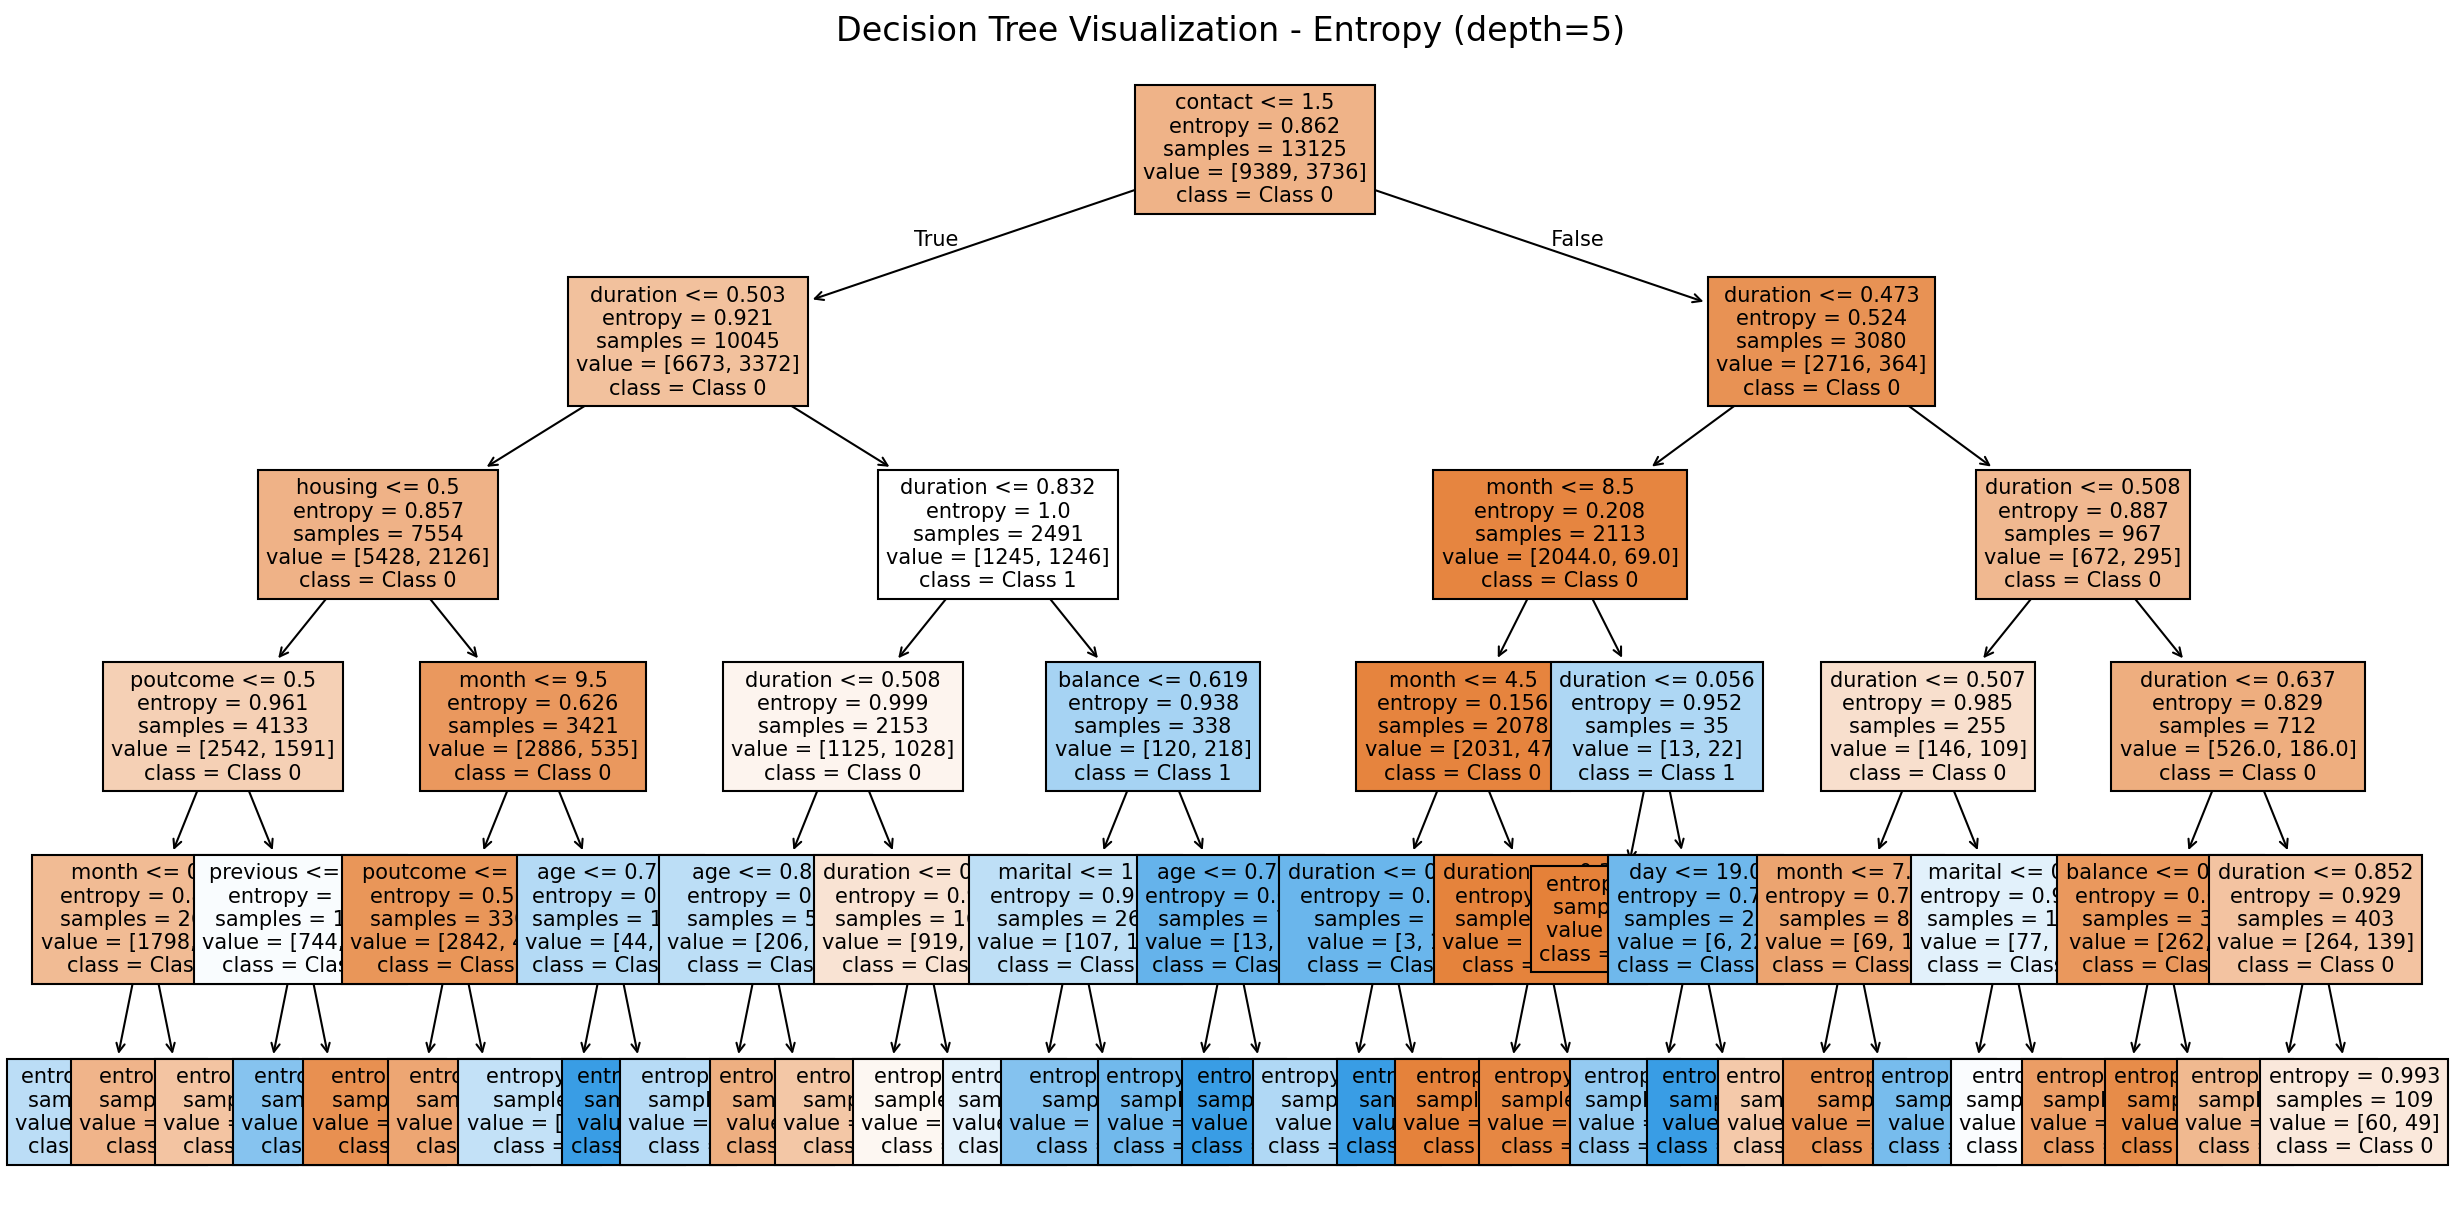

In [17]:
# Visualizing the Decision Tree for the model with Gini criteria and depth of 5
plt.figure(figsize=(20, 10), dpi=150)  # Set the figure size and increase DPI for higher resolution
tree.plot_tree(clf_gini,
               feature_names=X.columns,
               class_names=['Class 0', 'Class 1'],
               filled=True,
               max_depth=5,
               fontsize=10)

plt.title("Decision Tree Visualization - Gini (depth=5)", fontsize=16)
plt.show()

# Visualize the Decision Tree for the model with Entropy criteria and depth of 5
plt.figure(figsize=(20, 10), dpi=150)
tree.plot_tree(clf_entropy,
               feature_names=X.columns,
               class_names=['Class 0', 'Class 1'],  # Class names
               filled=True,                     #
               max_depth=5,
               fontsize=10)

plt.title("Decision Tree Visualization - Entropy (depth=5)", fontsize=16)
plt.show()

## Taking New dataset with only 6 best features

In [18]:
# Checking for dataset with only essential 6 features
X = df_dt[['duration','month','day','balance','age','job']]
y = df_dt['y']

In [19]:
# Train a basic Decision Tree to extract feature importances
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [20]:
# Split the dataset into training (75%) and testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Gini Criteria
clf_gini_new = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, random_state=42)
clf_gini_new.fit(X_train, y_train)

# Entropy Criteria
clf_entropy_new = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, random_state=42)
clf_entropy_new.fit(X_train, y_train)

# Predictions using both models
y_pred_gini_new = clf_gini_new.predict(X_test)
y_pred_entropy_new = clf_entropy_new.predict(X_test)

# both Gini and Entropy is a way to measure quality of split

Confusion Matrix for Gini:


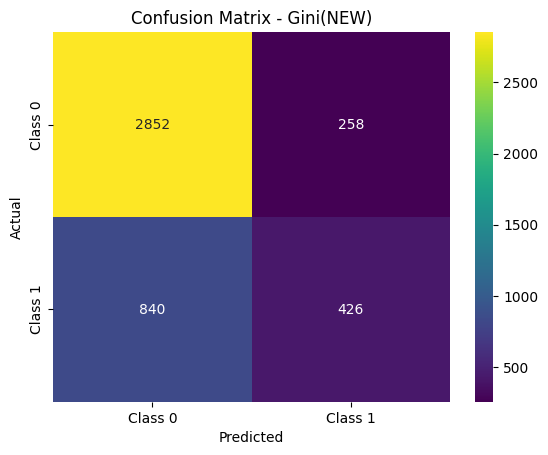



Confusion Matrix for Entropy:


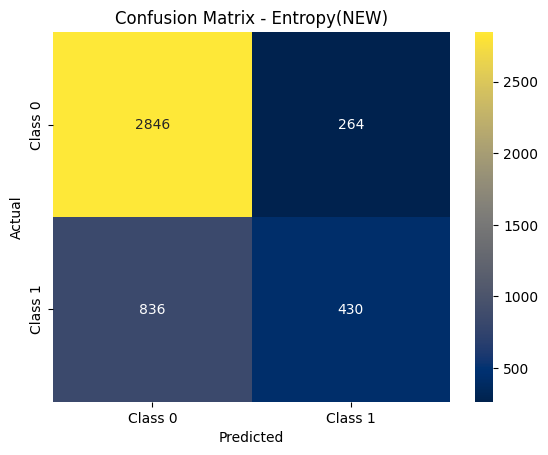

In [27]:
# Confusion Matrix for Gini
print("Confusion Matrix for Gini:")
cm_gini = confusion_matrix(y_test, y_pred_gini_new)
sns.heatmap(cm_gini, annot=True, fmt='d', cmap='viridis', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Gini(NEW)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('\n')

# Confusion Matrix for Entropy
print("Confusion Matrix for Entropy:")
cm_entropy = confusion_matrix(y_test, y_pred_entropy_new)
sns.heatmap(cm_entropy, annot=True, fmt='d', cmap='cividis', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Entropy(NEW)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In this case, based solely on the confusion matrix, the Gini index outperforms entropy.

In [22]:
# Classification Report for Gini
print("Classification Report for Gini:")
print(classification_report(y_test, y_pred_gini_new))

# Classification Report for Entropy
print("Classification Report for Entropy:")
print(classification_report(y_test, y_pred_entropy_new))

Classification Report for Gini:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      3110
           1       0.62      0.34      0.44      1266

    accuracy                           0.75      4376
   macro avg       0.70      0.63      0.64      4376
weighted avg       0.73      0.75      0.72      4376

Classification Report for Entropy:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      3110
           1       0.62      0.34      0.44      1266

    accuracy                           0.75      4376
   macro avg       0.70      0.63      0.64      4376
weighted avg       0.73      0.75      0.72      4376



##New dataset : Decision Tress

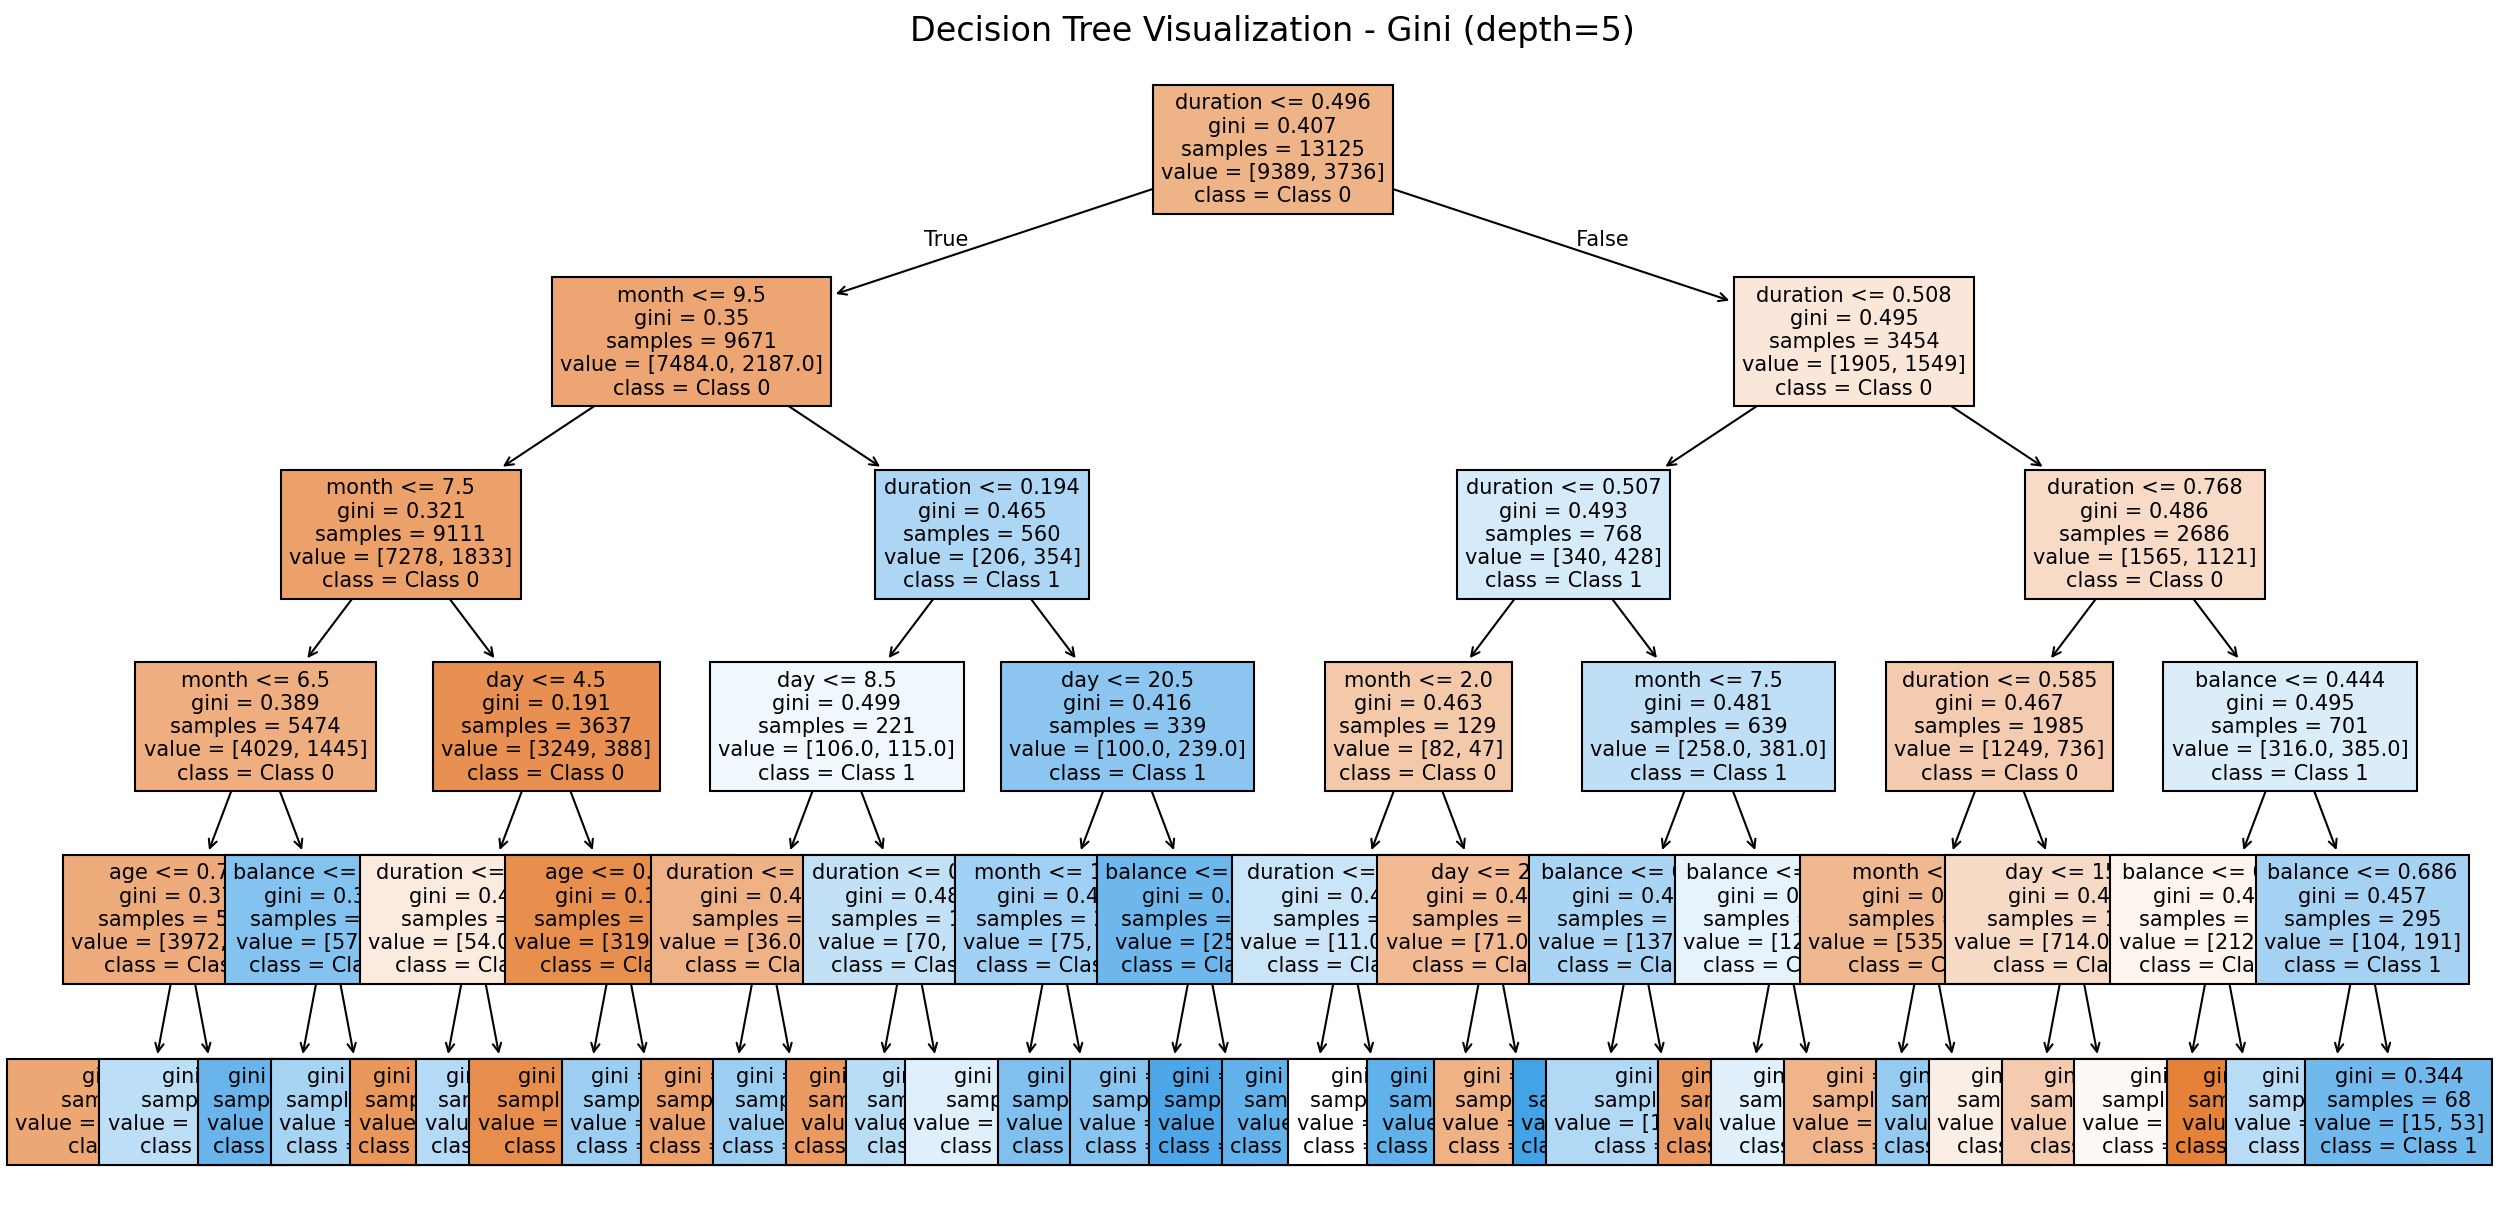

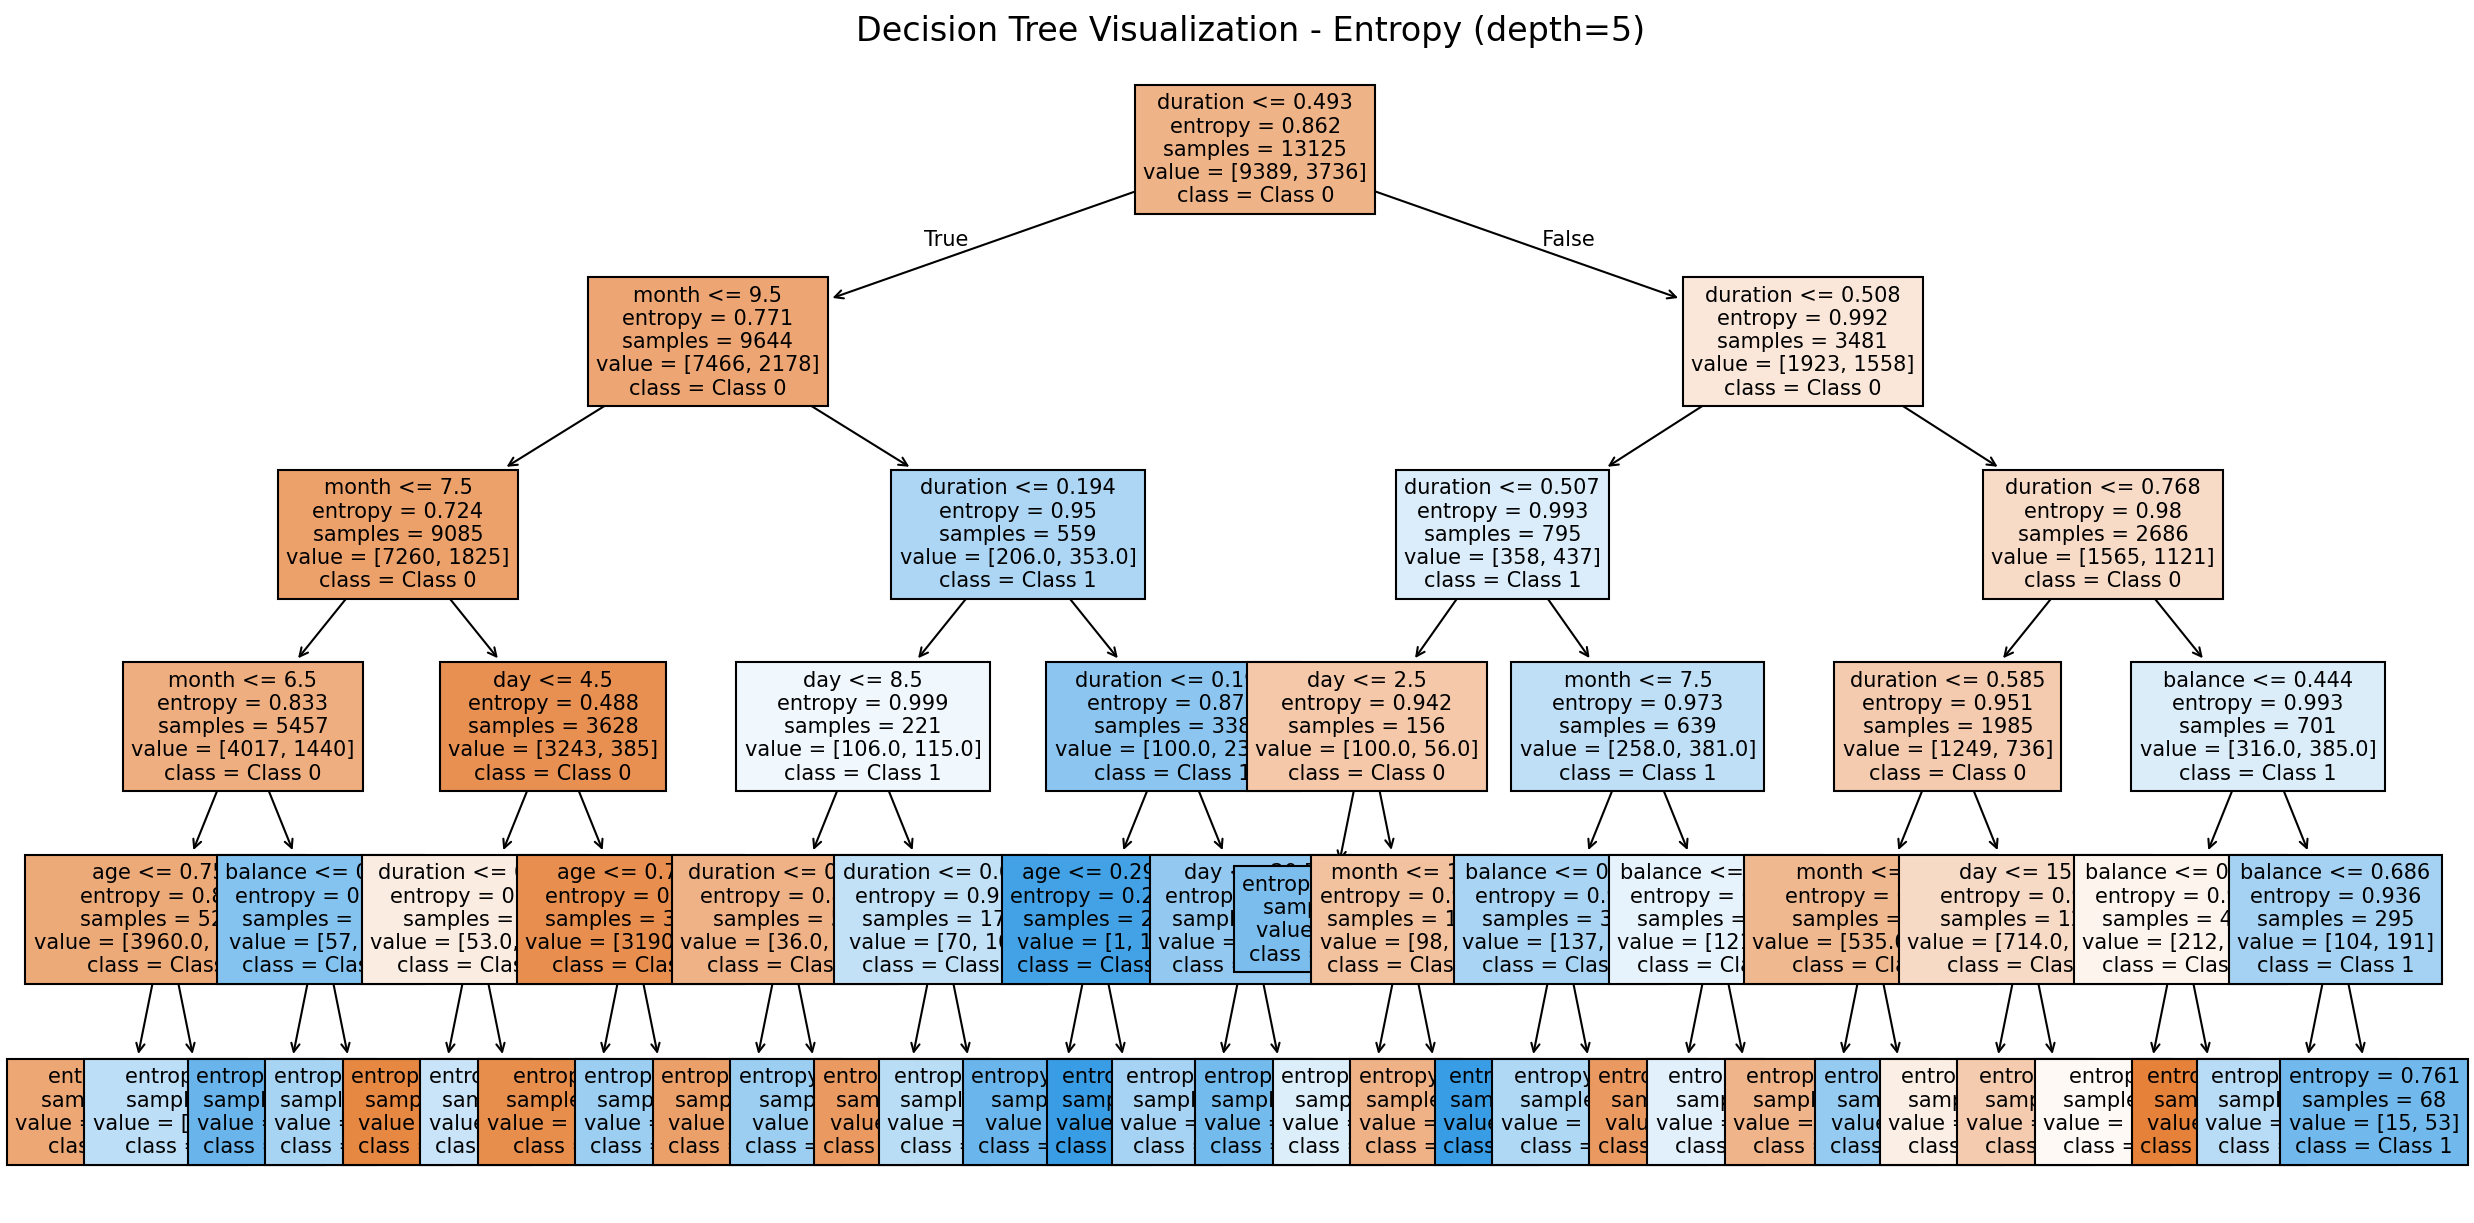

In [24]:
plt.figure(figsize=(20, 10), dpi=150)

# Plot the decision tree with reduced font size and increased details
tree.plot_tree(clf_gini_new,
               feature_names=X.columns,
               class_names=['Class 0', 'Class 1'],
               filled=True,
               max_depth=5,
               fontsize=10)
plt.title("Decision Tree Visualization - Gini (depth=5)", fontsize=16)
plt.show()

plt.figure(figsize=(20, 10), dpi=150)
# Plot the decision tree with reduced font size and increased details
tree.plot_tree(clf_entropy_new,
               feature_names=X.columns,
               class_names=['Class 0', 'Class 1'],
               filled=True,
               max_depth=5,
               fontsize=10)
plt.title("Decision Tree Visualization - Entropy (depth=5)", fontsize=16)
plt.show()